# Week 5 - Voice recognizion model 

In this assignment, we are going to apply what we learned about machine learning to a dataset of our choice.

We are going to create a Gender voice recognition model, which predicts the variable label (male or female) based on historical data.

### Dataset:
    
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).
    

### To do:


- Which dataset and variables I selected and why


- Your pre-processing steps (e.g., transformations of variables)

- The head()of the resulting data frame


##### Classification


  - Choose one of the following: k-nearest neighbor, decision tree or random forest
    
    
  - How the algorithm works


  - Split the data set into a training and test set


  - Train the model


  - Evaluate the predictive performance of our model on the test set


## Importing data 

In [1]:
# importing relevant libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing our data
df = pd.read_csv('voice.csv')
df = df.dropna() #first get rid of rows with empty cells
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preprocessing

In [3]:
df.shape

(3168, 21)

In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

We have a numeric matrix. only our target column is categorical.

In [6]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

There are the same amount of female and male voice.

In [7]:
dummies = pd.get_dummies(df['label'])
df = pd.concat([df, dummies], axis=1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,female,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0,1


In [8]:
df.corr().sort_values('female', ascending=False)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,female,male
female,0.337415,-0.479539,0.283919,0.511455,-0.066906,-0.618916,-0.036627,-0.087195,-0.490552,-0.357499,...,0.833921,0.136692,0.166461,0.191067,0.194974,0.195657,0.192213,-0.030801,1.000000,-1.000000
meanfun,0.460844,-0.466281,0.414909,0.545035,0.155091,-0.534462,-0.167668,-0.194560,-0.513194,-0.421066,...,1.000000,0.339387,0.311950,0.270840,0.162163,0.277982,0.275154,-0.054858,0.833921,-0.833921
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455,-0.511455
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415,-0.337415
centroid,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415,-0.337415
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919,-0.283919
maxdom,0.519528,-0.482278,0.438919,0.459683,0.335114,-0.337877,-0.305651,-0.274500,-0.324253,-0.436649,...,0.277982,0.317860,0.355390,0.812838,0.026640,1.000000,0.999838,-0.425531,0.195657,-0.195657
mindom,0.229261,-0.357667,0.191169,0.302255,-0.023750,-0.357037,-0.061608,-0.103313,-0.294869,-0.289593,...,0.162163,0.082015,-0.243426,0.099656,1.000000,0.026640,0.008666,0.200212,0.194974,-0.194974
dfrange,0.515570,-0.475999,0.435621,0.454394,0.335648,-0.331563,-0.304640,-0.272729,-0.319054,-0.431580,...,0.275154,0.316486,0.359880,0.811304,0.008666,0.999838,1.000000,-0.429266,0.192213,-0.192213
meandom,0.536666,-0.482726,0.455943,0.467403,0.359181,-0.333362,-0.336848,-0.303234,-0.293562,-0.428442,...,0.270840,0.375979,0.337553,1.000000,0.099656,0.812838,0.811304,-0.180954,0.191067,-0.191067


From this matrix we have a better understanding about the columns related to gender label.
We're gonna select 7 variables-features with strong predictive power. 

In [9]:
features = df[["meanfreq", "Q25", "IQR", "centroid",  "sp.ent", "meanfun", "label"]]
features.head()

,meanfreq,Q25,IQR,centroid,sp.ent,meanfun,label
0,0.059781,0.015071,0.075122,0.059781,0.893369,0.084279,male
1,0.066009,0.019414,0.073252,0.066009,0.892193,0.107937,male
2,0.077316,0.008701,0.123207,0.077316,0.846389,0.098706,male
3,0.151228,0.096582,0.111374,0.151228,0.963322,0.088965,male
4,0.135120,0.078720,0.127325,0.135120,0.971955,0.106398,male


## Exploratory Analysis

##### Mean Frequency

Text(0, 0.5, 'Mean Frequency')

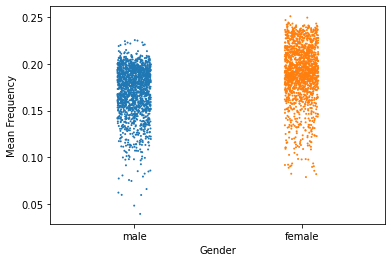

In [10]:
# Violin plot showing the relationship between two genders.
sns.stripplot(x=features['label'], y=features['meanfreq'], size=2)
plt.xlabel('Gender') 
plt.ylabel('Mean Frequency')

Text(0.42499999999999716, 0.5, 'Mean Frequency')

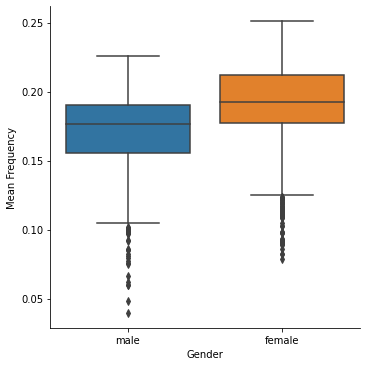

In [11]:
 #box plot for the same relationship.
sns.catplot(x=features['label'], y=features['meanfreq'], kind="box", data=features)
plt.xlabel('Gender') 
plt.ylabel('Mean Frequency')

- We can obviously assume that people with lower mean frequency (in kHz) are men. 

- No woman has a voice with mean frequency less than 0,07 kHZ

##### Q25

Text(0, 0.5, 'Mean Frequency')

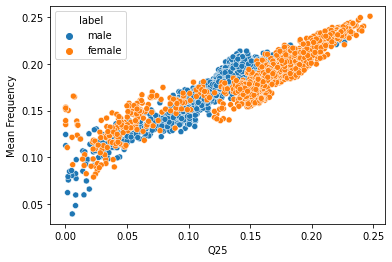

In [12]:
sns.scatterplot(x=features['Q25'], y=features['meanfreq'], hue=features['label'])
plt.xlabel('Q25') 
plt.ylabel('Mean Frequency')

D:\xrist\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Q25')

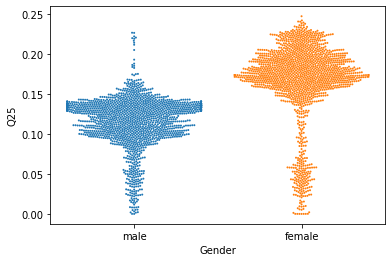

In [13]:
sns.swarmplot(x=features['label'], y=features['Q25'], size=2)
plt.xlabel('Gender') 
plt.ylabel('Q25')

- When the first quantile is lower on frquency (around 0.12) it is most likely to be a man.

We can deploy even more graphs to show different correlation between our features but for now we will procceed with our model.

## Bulding our model

- We're gonna use a RandomForest and try to optimize it.

In [14]:
X = df[["meanfreq", "Q25", "IQR", "centroid",  "sp.ent", "meanfun"]]
y = df['label']
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

- Our target y is a categorical Series (Only 2 values male and female).

- We'll use label encoding to convert these values in 0 and 1 respectivelly.

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

array([0, 1, 1, ..., 0, 0, 0])

In [17]:
# We're gonna do the same on our y_val remaining dataset.
y_val = label_encoder.fit_transform(y_val)
y_val.shape

(634,)

In [18]:
# Import our libraries.
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Preprocessing of training data, fit model 
model.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = model.predict(X_val)
print(preds)

[0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 

Our predictions..

## Model Validation

#### Mean Absolute Error (MAE):

In [19]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_val, preds))

MAE: 0.025236593059936908


- This is a very good model! In other words our model is almost 97,5 % accurate. :) 

#### Confusion matrix:

In [20]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_val) #the predicted values
cm = confusion_matrix(y_val, y_test_pred) #creates a "confusion matrix"
cm

array([[293,   8],
       [  8, 325]], dtype=int64)

In [22]:
conf_matrix = pd.DataFrame(cm, index=['Female (actual)', 'Male (actual)'], columns = ['Female (predicted)', 'Male (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,Female (predicted),Male (predicted)
Female (actual),293,8
Male (actual),8,325


As we can see from the confusion matrix, Male voice is predicted better than Female voice.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       301
           1       0.98      0.98      0.98       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



-  The precision for both female and male voice is very good (very close to 1)


-  About 2% of the male voice turns out to be female and 3% female voice turns out to be male.


-  The recall is also really hight. It misses only 2% of male voice and 3% of female voice.
